# **Trustworthy Machine Learning**
### Winter Semester 2022-2023
### Lecturer: Seong Joon Oh
### **Exercise 0 -- Preliminary Materials**

---

Student name <input> 

Student email <input> 

---

#### **Submission deadline: 27/10/2022 at 23:59.**

Welcome to the Trustworthy Machine Learning course! TML is an advanced course that assumes some basic knowledge of machine learning and deep learning. This zeroth exercise will test your prerequisite knowledge and skills. 

#### **Policy for the zeroth exercise**
This exercise is the **only individual exercise** in our course. The rest of the exercises in our course will be submitted and graded per group. The purpose of this zeroth exercise is to ensure that individual members of each group are sufficiently committed. As such, **we will enrol only the students who submit the zeroth exercise**. We will only accept solutions with the **minimal passing grade 30/100 points** to make sure that students do not submit empty work. The grade for the zeroth exercise **does not count towards the final grade**. The main purpose of this exercise is to selectively enrol motivated students and for you to evaluate your own readiness for the course. 


####**Submission**
Follow the below four steps.

(1) Copy this colab file to your local gdrive;

`File > Save a copy in Drive`

(2) Work on the solution on your local copy;

(3) Pin the version for submission in history;

`Click on "All changes saved" or "Last saved at XX:XX AM/PM" next to the drop-down menus at the top > Select version to submit > Click on three vertical dots (vertical ellipsis) > Rename > Write "Submission" `

(4) Share your local colab with `stai.there@gmail.com` before the deadline.

`Click on "Share" at the top-right corner > Put stai.there@gmail.com in "Add people and groups" > Give the "Viewer" right and tick on "Notify people" > Click send.`

Note that we are able to see the edit history with time stamps, so please ensure that you stop working on your notebook before the deadline.

## **0.1 Multivariate Calculus (10 + 10 + 5 = 25 points)**

Let $f\in\mathbb{R}^C$ be a vector with dimension $C$, equal to the number of classes. Let $Y\in\{1,\cdots,C\}$ be the corresponding ground-truth label. We define the softmax-cross-entropy loss as follows:
\begin{equation}
    \mathcal{L} = -\sum_{j=1}^C \delta_{jY} \log \frac{\exp{f_j}}{\sum_k \exp{f_k}}
\end{equation}
where $\delta_{ab}$ is the Kronecker Delta:
\begin{equation}
    \delta_{ab} = 
    \begin{cases}
        1\quad \text{if $a=b$;} \\
        0\quad \text{otherwise;}
    \end{cases}
\end{equation}

(a) Compute the gradient $\frac{\partial \mathcal{L}}{\partial f_c}$ for $c\in\{1,\cdots,C\}$. It may be helpful to introduce the substitution $p_j:=\frac{\exp{f_j}}{\sum_k \exp{f_k}}$. **(10 points)**

**WRITE YOUR SOLUTION HERE**

Let $\{(X_i, Y_i)\}_{i=1}^N$ be data samples with $X\in\mathbb{R}^D$ (e.g. images) and $Y\in\{1,\cdots,C\}$ (e.g. labels). Let  $f:\mathbb{R}^I\rightarrow\mathbb{R}^C$ be a two-layer neural network of the following architecture
\begin{equation}
    f(X;W,V) = V\cdot \sigma(W\cdot X)
\end{equation}
where $W\in\mathbb{R}^{H\times D}$ maps $X$ to a hidden space $\mathbb{R}^H$, $\sigma$ is the element-wise ReLU activation function $\sigma(x)=\max\{0,x\}$, and $V\in\mathbb{R}^{C\times H}$ maps a hidden representation to the output space $\mathbb{R}^C$. Now, plug in our two-layer neural network to the $f$ in the softmax-cross-entropy loss:
\begin{equation}
    \mathcal{L}(W,V) = -\sum_{j=1}^C \delta_{jY} \log \frac{\exp{f_j(X;W,V)}}{\sum_k \exp{f_k(X;W,V)}}
\end{equation}

(b) Compute the gradient $\frac{\partial \mathcal{L}}{\partial V_{ch}}$ for $c\in\{1,\cdots,C\}$ and $h\in\{1,\cdots,H\}$ using the answer to (a) and chain rule. **(10 points)**

**WRITE YOUR SOLUTION HERE**

(c) Compute the gradient $\frac{\partial \mathcal{L}}{\partial W_{hd}}$ for $h\in\{1,\cdots,H\}$ and $d\in\{1,\cdots,D\}$ using the answer to (b) and chain rule. **(5 points)**

**WRITE YOUR SOLUTION HERE**

## **0.2 Generalisation (5 + 5 + 5 + 5 + 5 = 25 points)**


(a) What is the role of training, validation, and test splits of a dataset for machine learning? **(5 points)**

**WRITE YOUR SOLUTION HERE**

Consider an image classification task, where $X\in\mathbb{R}^D$ is an input image and $Y\in\{1,\cdots,C\}$ is the corresponding label following $p(X,Y)$. Let $\mathcal{D}^\text{tr}=\{(X_i,Y_i)\}_{i=1}^N$ and $\mathcal{D}^\text{te}=\{(X_i,Y_i)\}_{i=N+1}^{N+M}$ be training and test samples, respectively, that are IID-sampled from $p(X,Y)$. Let $f_\theta$ be a model trained on $\mathcal{D}^\text{tr}$. Write $f_\theta(c,X)\in[0,1]$ for the predicted probability that image $X$ belongs to class $c$.

(b) Write down the equations for the training- and test-set accuracies of $p_\theta$. **(5 points)**

**WRITE YOUR SOLUTION HERE**

(c) Explain what it means to say that $f_\theta$ "generalises well" and introduce a quantitative metric for this. **(5 points)**

**WRITE YOUR SOLUTION HERE**

(d) Explain the concept of overfitting and underfitting. **(5 points)**


**WRITE YOUR SOLUTION HERE**

(e) Explain the respective solutions for overfitting and underfitting. **(5 points)**

**WRITE YOUR SOLUTION HERE**

## **0.3 MNIST Case-study (15 + 15 + 10 + 10 = 50 points)**

*This exercise is based on the public code at https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/MNIST.ipynb (BSD 3-Clause License)*.

In [ ]:
! [ ! -z "$COLAB_GPU" ] && pip install torch scikit-learn==0.20.* skorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import logging

### Loading Data

The following code downloads MNIST. It takes 2-3 minutes.

In [ ]:
mnist = fetch_openml('mnist_784', cache=True)

In [ ]:
mnist.data.shape

(70000, 784)

### Preprocessing Data

Each image of the MNIST dataset is encoded in a 784 dimensional vector, representing a 28 x 28 pixel image. Each pixel has a value between 0 and 255, corresponding to the grey-value of a pixel.<br />
The above ```featch_mldata``` method to load MNIST returns ```data``` and ```target``` as ```uint8``` which we convert to ```float32``` and ```int64``` respectively.

In [ ]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

To avoid big weights that deal with the pixel values from between [0, 255], we scale `X` down. A commonly used range is [0, 1].

In [ ]:
X /= 255.0

In [ ]:
X.min(), X.max()

(0.0, 1.0)

### Preparing Train-Val-Test Splits (15 points)

Let's split the given MNIST data (70000 samples) into 3 partitions: train, val, and test. Complete the function `train_test_split` **(15 points)**.

In [ ]:
def train_test_split(X, y, val_size, test_size, random_seed=None):
  """
  Given a labelled dataset in memory, return two disjoint partitions, train and test, randomly split according to the given test_size.
  For replicability, make sure that the same random_seed returns the same split of the dataset.
  Args:
    X: numpy.ndarray of shape (N, D) and type np.float32. N is the number of sample instances and D is the dimensionality of input features.
    y: numpy.ndarray of shape (N,) and type np.int64.
    val_size: float value between 0 and 1. Controls the ratio of val samples.
    test_size: float value between 0 and 1. Controls the ratio of test samples.
    random_seed: int or None. If it is int, set the random seed to ensure replicability. If it is None, do not set the random seed.
  Returns:
    dict of
      X_train: numpy.ndarray of shape (N - L - M, D) and type np.float32.
      y_train: numpy.ndarray of shape (N - L - M,) and type np.int64.
      X_val: numpy.ndarray of shape (L, D) and type np.float32. L = int(N * val_size).
      y_val: numpy.ndarray of shape (L,) and type np.int64.
      X_test: numpy.ndarray of shape (M, D) and type np.float32. M = int(N * test_size).
      y_test: numpy.ndarray of shape (M,) and type np.int64.
  """
  #### >>>> PUT YOUR SOLUTION HERE <<<< 15 points

  #### >>>> ENT OF YOUR SOLUTION <<<<
  return {
      "X_train": X_train,
      "y_train": y_train,
      "X_val": X_val,
      "y_val": y_val,
      "X_test": X_test,
      "y_test": y_test,
  }

Define test functions.

In [ ]:
def compute_diff_matrix(mat1, mat2, max_samples):
  """
  Compute the pairwise L1 distance among the feature vectors in mat1 and mat2.
  Args:
    mat1: array of shape (N, D) where D is the feature dimension.
    mat2: array of shape (M, D)
    max_samples: for the interest of RAM usage, we may restrict the max number of samples
  Returns:
    dist_mat: array of shape (N, M) where N <- min(max_samples, N) and M <- min(max_samples, M)
  """
  num_samples1 = min(max_samples, len(mat1))
  num_samples2 = min(max_samples, len(mat2))
  diff_matrix = np.abs(
      np.expand_dims(mat1[:num_samples1], axis=0) # (1, N, D)
    - np.expand_dims(mat2[:num_samples2], axis=1) # (M, 1, D)
  ).sum(axis=2)
  return diff_matrix


def train_test_split_test(X, y):
  print(f"Checking train-val-test split sizes.")
  data_splits = train_test_split(X, y, val_size=0.2, test_size=0.5, random_seed=None)
  assert(len(data_splits["X_train"]) == 21000)
  assert(len(data_splits["X_val"]) == 14000)
  assert(len(data_splits["X_test"]) == 35000)
  assert(len(data_splits["y_train"]) == 21000)
  assert(len(data_splits["y_val"]) == 14000)
  assert(len(data_splits["y_test"]) == 35000)
  data_splits = train_test_split(X, y, val_size=0.1, test_size=0.8, random_seed=None)
  assert(len(data_splits["X_train"]) == 7000)
  assert(len(data_splits["X_val"]) == 7000)
  assert(len(data_splits["X_test"]) == 56000)
  assert(len(data_splits["y_train"]) == 7000)
  assert(len(data_splits["y_val"]) == 7000)
  assert(len(data_splits["y_test"]) == 56000)

  print(f"Checking train-test split purity.")
  diff_matrix_tr_te = compute_diff_matrix(mat1=data_splits["X_train"],
                                          mat2=data_splits["X_test"],
                                          max_samples=1000)
  assert(diff_matrix_tr_te.min() > 0)
  diff_matrix_tr_val = compute_diff_matrix(mat1=data_splits["X_train"],
                                           mat2=data_splits["X_val"],
                                           max_samples=1000)
  assert(diff_matrix_tr_val.min() > 0)
  diff_matrix_te_val = compute_diff_matrix(mat1=data_splits["X_test"],
                                           mat2=data_splits["X_val"],
                                           max_samples=1000)
  assert(diff_matrix_te_val.min() > 0)

  print(f"Checking whether random seed is working.")
  data_splits1 = train_test_split(X, y, val_size=0.1, test_size=0.3, random_seed=65)
  data_splits2 = train_test_split(X, y, val_size=0.1, test_size=0.3, random_seed=65)
  data_splits3 = train_test_split(X, y, val_size=0.1, test_size=0.3, random_seed=66)
  data_splits4 = train_test_split(X, y, val_size=0.1, test_size=0.3, random_seed=None)
  data_splits5 = train_test_split(X, y, val_size=0.1, test_size=0.3, random_seed=None)
  
  assert((data_splits1["X_train"]==data_splits2["X_train"]).all())
  assert((data_splits2["X_train"]!=data_splits3["X_train"]).any())
  assert((data_splits4["X_train"]!=data_splits5["X_train"]).any())

Test your solution by running the test function below.

In [ ]:
train_test_split_test(X, y)

Checking train-val-test split sizes.
Checking train-test split purity.
Checking whether random seed is working.


In [ ]:
data_splits = train_test_split(X, y, val_size=0.1, test_size=0.1, random_seed=42)

In [ ]:
for key in data_splits:
  print(f"{key} shape: {data_splits[key].shape}")

X_train shape: (56000, 784)
y_train shape: (56000,)
X_val shape: (7000, 784)
y_val shape: (7000,)
X_test shape: (7000, 784)
y_test shape: (7000,)


In [ ]:
def plot_example(X, y, num_samples=10):
    """Plot the first N images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:num_samples].reshape(num_samples, 28, 28), y[:num_samples])):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

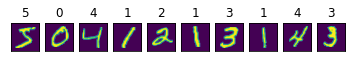

In [ ]:
plot_example(data_splits["X_train"], data_splits["y_train"])

### Define an MLP Model
Simple, fully connected neural network with one hidden layer. Input layer has 784 dimensions (28x28), hidden layer has 98 (= 784 / 8) and output layer 10 neurons, representing digits 0 - 9.

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cpu'

In [ ]:
class MLP(nn.Module):
    def __init__(
            self,
            input_dim,
            hidden_dim,
            output_dim,
            dropout=0.5,
    ):
        super(MLP, self).__init__()
        print(f"input_dim={input_dim}, hidden_dim={hidden_dim}, output_dim={output_dim}")

        self.dropout = nn.Dropout(dropout)

        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        X = self.dropout(X)
        X = F.softmax(self.output(X), dim=-1)
        return X

### Define the Loss Function (15 points)

We train the model with the softmax-cross-entropy loss. The first part of the function is already there.
```
outputs = outputs - outputs.max(1, keepdim=True)[0]
```
This part ensures the numerical stability of the softmax operation, which is translation invariant.
```
labels_onehot = F.one_hot(labels, num_classes=10)
```
This part turns the integer labels into one-hot vectors.

Complete the loss function **(15 points)**.

In [ ]:
class SoftmaxCrossEntropyLoss(nn.Module):
  def forward(self, outputs, labels):
    """
    Compute softmax cross-entropy loss.
    Args:
      outputs: Torch.Tensor of shape (B, C) and type float32.
      labels: Torch.Tensor of shape (B,) and type long.
    Returns:
      loss: Torch.Tensor of scalar shape and type float32.
    """
    outputs = outputs - outputs.max(1, keepdim=True)[0]
    labels_onehot = F.one_hot(labels, num_classes=10) # shape (B, C) type bool

    #### >>>> PUT YOUR SOLUTION HERE <<<< 15 points

    #### >>>> ENT OF YOUR SOLUTION <<<<
    return loss

### Define Solver

A programming framework that is often used to manage model training, inference, and evaluation is the Solver object. This is advantageous because such activities around a model share common data and methods: 
- Model (torch.nn.Module)
- Dataset (torch.utils.data.Dataset)

We have defined the Solver class for you. You may find this framework useful for managing ML code later on.

In [ ]:
class Solver(object):
  def __init__(self, data_splits, model, criterion, config):
    self.config = config
    self.model = model
    self.criterion = criterion
    self.optimizer = optim.SGD(self.model.parameters(),
                               lr=config["lr"],
                               momentum=config["momentum"])
    self.data_splits = data_splits

  def load_dataloader(self, split, role):
    if role == "eval":
      batch_size = config["eval_batch_size"]
      shuffle = True
    elif role == "train":
      batch_size = config["batch_size"]
      shuffle = False
    else:
      raise ValueError(f"Unknown role name {role}.")
    
    return torch.utils.data.DataLoader(
      torch.utils.data.TensorDataset(
          torch.from_numpy(self.data_splits[f"X_{split}"]),
          torch.from_numpy(self.data_splits[f"y_{split}"])
      ), 
      batch_size=batch_size,
      shuffle=shuffle,
      num_workers=config["num_workers"])

  def fit_one_batch(self, inputs, labels):
    self.optimizer.zero_grad()
    outputs = self.model(inputs)
    loss = self.criterion(outputs, labels)
    loss.backward()
    self.optimizer.step()
    return loss

  def fit_one_epoch(self, epoch_idx):
    loss_epoch = 0.0
    dataloader = self.load_dataloader(split="train", role="train")
    for batch_idx, (inputs, labels) in enumerate(dataloader):
      loss = self.fit_one_batch(inputs, labels)
      loss_epoch += loss.item()
    loss_epoch /= batch_idx + 1
    print(f"train_loss {loss_epoch: 2.3f}", end="\t")

  def fit(self, evaluate_on):
    for epoch_idx in range(self.config["num_epochs"]):
      print(f"epoch {epoch_idx + 1:03d}", end="\t")
      self.fit_one_epoch(epoch_idx)
      accuracy = self.evaluate(evaluate_on)
      print(f"val_accuracy: {accuracy: 2.3f}%", end="\t")
      print()

  def evaluate(self, evaluate_on):
    correct = 0
    total = 0
    dataloader = self.load_dataloader(split=evaluate_on, role="eval")
    with torch.no_grad():
      for (inputs, labels) in dataloader:
        outputs = self.model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return 100 * correct / total

### Train Model

Initialise your solver with some initial config values and train the model

In [ ]:
config = {
  # Critical configs that affect the trained model
  "batch_size": 512,
  "lr": 0.001,
  "momentum": 0.9,
  "num_epochs": 50,
  # Configs that do not influence the trained model
  "num_workers": 0,
  "eval_batch_size": 128,
}

input_dim = data_splits["X_train"].shape[1]

solver = Solver(
    data_splits=data_splits,
    model=MLP(
      input_dim=input_dim,
      hidden_dim=int(input_dim/8),
      output_dim=10,
    ),
    criterion=SoftmaxCrossEntropyLoss(),
    config=config,
)

solver.fit(evaluate_on="val")
accuracy = solver.evaluate(evaluate_on="val")
print(f"Final accuracy: {accuracy:.3f}%")

input_dim=784, hidden_dim=98, output_dim=10
epoch 001	train_loss  2.302	val_accuracy:  12.429%	
epoch 002	train_loss  2.300	val_accuracy:  17.443%	
epoch 003	train_loss  2.297	val_accuracy:  22.629%	
epoch 004	train_loss  2.295	val_accuracy:  28.143%	
epoch 005	train_loss  2.292	val_accuracy:  32.429%	
epoch 006	train_loss  2.288	val_accuracy:  35.186%	
epoch 007	train_loss  2.284	val_accuracy:  37.343%	
epoch 008	train_loss  2.279	val_accuracy:  39.243%	
epoch 009	train_loss  2.273	val_accuracy:  40.086%	
epoch 010	train_loss  2.265	val_accuracy:  39.871%	
epoch 011	train_loss  2.255	val_accuracy:  39.029%	
epoch 012	train_loss  2.242	val_accuracy:  38.571%	
epoch 013	train_loss  2.228	val_accuracy:  39.814%	
epoch 014	train_loss  2.212	val_accuracy:  41.400%	
epoch 015	train_loss  2.196	val_accuracy:  42.971%	
epoch 016	train_loss  2.177	val_accuracy:  43.429%	
epoch 017	train_loss  2.157	val_accuracy:  45.100%	
epoch 018	train_loss  2.136	val_accuracy:  46.786%	
epoch 019	train_loss

### Hyperparameter Tuning (10 points)

Now, find a config set (`batch_size`, `lr`, `momentum`) that returns a **validation-set accuracy >= 95%** at any epoch <=50 **(10 points)**.

**You may not change the training data.**

In [ ]:
#### >>>> PUT YOUR SOLUTION HERE <<<< 10 points
config = {
  # Critical configs that affect the trained model
  "batch_size": 512,
  "lr": 0.001,
  "momentum": 0.9,
  "num_epochs": 50,
  # Configs that do not influence the trained model
  "num_workers": 0,
  "eval_batch_size": 128,
}
#### >>>> ENT OF YOUR SOLUTION <<<<

input_dim = data_splits["X_train"].shape[1]

solver = Solver(
    data_splits=data_splits,
    model=MLP(
      input_dim=input_dim,
      hidden_dim=int(input_dim/8),
      output_dim=10,
    ),
    criterion=SoftmaxCrossEntropyLoss(),
    config=config
)

solver.fit(evaluate_on="val")
accuracy = solver.evaluate(evaluate_on="val")
print(f"Final accuracy: {accuracy:.3f}%")

### Define a CNN Model
We may take advantage of the image structure to enjoy more efficient usage of model parameters. CNNs assume that parameters can be devoted to model the composition of nearby pixels in an image, rather than any long-range dependence. We define a CNN model for you. This is a LeNet structure.

In [ ]:
class CNN(nn.Module):
    def __init__(self, dropout=0.5):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv2_drop = nn.Dropout2d(p=dropout)
        self.fc1 = nn.Linear(1600, 100) # 1600 = number channels * width * height
        self.fc2 = nn.Linear(100, 10)
        self.fc1_drop = nn.Dropout(p=dropout)

    def forward(self, x):
        x = x.reshape(-1, 1, 28, 28)
        x = torch.relu(F.max_pool2d(self.conv1(x), 2))
        x = torch.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        
        # flatten over channel, height and width = 1600
        x = x.view(-1, x.size(1) * x.size(2) * x.size(3))
        
        x = torch.relu(self.fc1_drop(self.fc1(x)))
        x = torch.softmax(self.fc2(x), dim=-1)
        return x

### Train a CNN Model

In [ ]:
config = {
  # Critical configs that affect the trained model
  "batch_size": 128,
  "lr": 0.1,
  "momentum": 0.9,
  "num_epochs": 10,
  # Configs that do not influence the trained model
  "num_workers": 0,
  "eval_batch_size": 128,
}

input_dim = data_splits["X_train"].shape[1]

solver = Solver(
    data_splits=data_splits,
    model=CNN(),
    criterion=SoftmaxCrossEntropyLoss(),
    config=config
)

solver.fit(evaluate_on="val")
accuracy = solver.evaluate(evaluate_on="val")
print(f"Final accuracy: {accuracy:.3f}%")

### Report (10 points)

We want to answer the research question: Is MLP or CNN more advantageous for MNIST digit classification task?

Make an argument below, based on empirical evidence, which architecture is "better"?

For answering this question, consider the following aspects:
- Accuracy, indeed, but also
- Computational complexity
  - Space and time
  - Training and inference
- Fairness of hyperparameter tuning and model choice
- Error bar of accuracy

Feel free to run additional model training experiments to support your argument. **(10 points)**

**WRITE YOUR SOLUTION HERE**
